In [56]:
### Dejiang Yin, 2025/11/21 @ dj dot yin at qq dot com

In [44]:
import psrqpy
from psrqpy import QueryATNF
import psrqpy.utils
import shutil
import os

In [45]:
## 输出核心脚本路径，Cache文件内有 ATNF 数据表缓存，删掉后再执行得到最新版本，其他列表如GCpsr是实时下载最新。
import psrqpy.utils
print(psrqpy.utils.__file__)
import psrqpy
print(psrqpy.__file__)
import psrqpy.utils
print(psrqpy.utils.CACHEDIR)

C:\Users\LEGION\anaconda3\Lib\site-packages\psrqpy\utils.py
C:\Users\LEGION\anaconda3\Lib\site-packages\psrqpy\__init__.py
C:\Users\LEGION\AppData\Local\psrqpy\Cache


In [46]:
# 获取缓存目录
cache_dir = psrqpy.utils.CACHEDIR
print(f"psrqpy cache directory: {cache_dir}")

# 如果缓存目录存在则删除(强制)
if os.path.exists(cache_dir):
    print("Deleting psrqpy cache...")
    shutil.rmtree(cache_dir)
    print("Cache cleared.")
else:
    print("Cache directory does not exist. Nothing to delete.")

# 现在开始重新查询，将自动生成最新缓存
print("Querying ATNF to regenerate cache...")
query = QueryATNF()  # 默认从网络下载最新 ATNF 数据
ATNF_psr = query.pandas
numstring = 'Version {} of the ATNF catalogue contains {} pulsars'

print(numstring.format(query.get_version, query.num_pulsars))
print("ATNF query finished. Latest data loaded.")
print(ATNF_psr.head())

psrqpy cache directory: C:\Users\LEGION\AppData\Local\psrqpy\Cache
Deleting psrqpy cache...
Cache cleared.
Querying ATNF to regenerate cache...


Version 2.7.0 of the ATNF catalogue contains 4351 pulsars
ATNF query finished. Latest data loaded.
         PSRJ PSRJ_REF          RAJ  RAJ_ERR RAJ_REF         DECJ  DECJ_ERR  \
0  J0002+6216   cwp+17  00:02:58.17     0.02  cwp+17  +62:16:09.4       0.1   
1  J0006+1834    cnt96   00:06:04.8     0.20    cn95    +18:34:59       4.0   
2  J0007+7303  aaa+09c   00:07:01.7     0.20  awd+12  +73:03:07.4       0.8   
3    J0011+08   dsm+16     00:11:34    31.00  dsm+16       +08:10       8.0   
4  J0012+5431   dcm+23   00:12:23.3     0.10  dcm+23    +54:31:40       9.0   

  DECJ_REF  POSEPOCH POSEPOCH_REF  ...  UPRMASS  MASSFN_ERR MINOMDOT  \
0   cwp+17   55806.0       cwp+17  ...      NaN         NaN      NaN   
1     cn95   49079.5         cn95  ...      NaN         NaN      NaN   
2   awd+12   54952.0       awd+12  ...      NaN         NaN      NaN   
3   dsm+16   57022.0       dsm+16  ...      NaN         NaN      NaN   
4   dcm+23   59128.0       dcm+23  ...      NaN         NaN      N

In [22]:
# 检查实际的版本的数量是否最新 ？
from psrqpy.utils import get_catalogue
# 先更新缓存
get_catalogue(update=True)
print(len(get_catalogue(update=True)))

4351


In [23]:
ATNF_psr

PSRJ PSRJ_REF            RAJ  RAJ_ERR RAJ_REF          DECJ  \
0     J0002+6216   cwp+17    00:02:58.17   0.0200  cwp+17   +62:16:09.4   
1     J0006+1834    cnt96     00:06:04.8   0.2000    cn95     +18:34:59   
2     J0007+7303  aaa+09c     00:07:01.7   0.2000  awd+12   +73:03:07.4   
3       J0011+08   dsm+16       00:11:34  31.0000  dsm+16        +08:10   
4     J0012+5431   dcm+23     00:12:23.3   0.1000  dcm+23     +54:31:40   
...          ...      ...            ...      ...     ...           ...   
4346  J2354-2250   mbc+19       23:54:26      NaN  mbc+19     -22:51:53   
4347  J2355+0051   mzl+23  23:55:51.2885   0.0014  mzl+23  +00:51:09.57   
4348    J2355+04   ttk+24       23:55:30      NaN  ttk+24         04:43   
4349  J2355+1523   dcm+23    23:55:48.62   0.0800  dcm+23     +15:23:19   
4350  J2355+2246   acd+19     23:55:49.8   0.3000  acd+19     +22:46:17   

      DECJ_ERR DECJ_REF      POSEPOCH POSEPOCH_REF  ...   UPRMASS  \
0         0.10   cwp+17  55806.000000       cwp+17  ...       NaN   
1         4.00     cn95  49079.500000         cn95  ...       NaN   
2         0.80   awd+12  54952.000000       awd+12  ...       NaN   
3         8.00   dsm+16  57022.000000       dsm+16  ...       NaN   
4         9.00   dcm+23  59128.000000       dcm+23  ...       NaN   
...        ...      ...           ...          ...  ...       ...   
4346       NaN   mbc+19  54973.000000       mbc+19  ...       NaN   
4347      0.04   mzl+23  59492.667393       mzl+23  ...  0.634719   
4348     15.00   ttk+24           NaN          NaN  ...       NaN   
4349      2.00   dcm+23  59121.000000       dcm+23  ...       NaN   
4350      8.00   acd+19  57102.000000       acd+19  ...       NaN   

        MASSFN_ERR  MINOMDOT         H0_SD  \
0              NaN       NaN  2.884717e-26   
1              NaN       NaN  5.155743e-26   
2              NaN       NaN  6.153093e-25   
3              NaN       NaN           NaN   
4              NaN       NaN  9.671186e-28   
...            ...       ...           ...   
4346           NaN       NaN           NaN   
4347  1.291439e-09  0.004462  7.828224e-28   
4348           NaN       NaN           NaN   
4349           NaN       NaN  4.582996e-27   
4350           NaN       NaN  1.689489e-26   

                                             ASSOC_ORIG ASSOC_REF  \
0     GRS:4FGL_J0002.8+6217[aab+22],XRS:1XSPS_J00025...    aab+22   
1                                                   NaN             
2     GRS:4FGL_J0007.0+7303[aab+22],XRS:RX_J0007.0+7...    aab+22   
3                                                   NaN             
4                                                   NaN             
...                                                 ...       ...   
4346                                                NaN             
4347                                                NaN             
4348                                                NaN             
4349                                                NaN             
4350                                                NaN             

         TYPE_ORIG  TYPE_REF BINCOMP_ORIG  BINCOMP_REF  
0       HE[wcp+18]    wcp+18          NaN               
1              NaN                    NaN               
2     NRAD[aab+22]    aab+22          NaN               
3              NaN                    NaN               
4     RRAT[dcm+23]    dcm+23          NaN               
...            ...       ...          ...          ...  
4346           NaN                    NaN               
4347           NaN             He[mzl+23]       mzl+23  
4348           NaN                    NaN               
4349  RRAT[dcm+23]    dcm+23          NaN               
4350           NaN                    NaN               

[4351 rows x 511 columns]

In [8]:
# ATNF_psr.to_csv(r'E:\Docker\data\Workshop\plot\ATNF_psr_data.csv', index=False)
# ATNF_psr.to_csv(r'./ATNF_psr_v2.7.0.csv', index=False)

In [39]:
from psrqpy import QueryATNF
import numpy as np
q = QueryATNF()
# 获取 TYPE 列并去除空值
types = q.table['TYPE']
#types = types[types != None]   # astropy Table 不支持 dropna
# 查看所有 unique 类型（未拆分）
print(types)

TYPE
----
  HE
  --
NRAD
  --
RRAT
  --
  --
  HE
  --
  --
  --
  --
  --
 ...
  --
  --
  --
  --
  --
  --
  --
  --
  --
  --
  --
RRAT
  --
Length = 4351 rows


In [50]:
# query.ppdot(showSNRs=True, showtypes='all')

In [51]:
help(query.ppdot)

Help on method ppdot in module psrqpy.search:

ppdot(intrinsicpdot=False, excludeGCs=False, showtypes=[], showGCs=False, showSNRs=False, markertypes={}, deathline=True, deathmodel='Ip', filldeath=True, filldeathtype={}, showtau=True, brakingidx=3, tau=None, showB=True, Bfield=None, pdotlims=None, periodlims=None, usecondition=True, usepsrs=True, rcparams={'figure.figsize': (9, 9.5), 'figure.dpi': 250, 'text.usetex': False, 'axes.linewidth': 0.5, 'axes.grid': False, 'font.family': 'sans-serif', 'font.sans-serif': 'Avant Garde, Helvetica, Computer Modern Sans serif', 'font.size': 20, 'legend.fontsize': 16, 'legend.frameon': False}) method of psrqpy.search.QueryATNF instance
    Draw a lovely period vs period derivative diagram.
    
    Args:
        intrinsicpdot (bool): use the intrinsic period derivative corrected
            for the `Shklovskii effect <https://en.wikibooks.org/wiki/Pulsars_and_neutron_stars/Pulsar_properties#Pulse_period>`_
            rather than the observed value.

In [52]:
import inspect
print(inspect.signature(query.ppdot))

(intrinsicpdot=False, excludeGCs=False, showtypes=[], showGCs=False, showSNRs=False, markertypes={}, deathline=True, deathmodel='Ip', filldeath=True, filldeathtype={}, showtau=True, brakingidx=3, tau=None, showB=True, Bfield=None, pdotlims=None, periodlims=None, usecondition=True, usepsrs=True, rcparams={'figure.figsize': (9, 9.5), 'figure.dpi': 250, 'text.usetex': False, 'axes.linewidth': 0.5, 'axes.grid': False, 'font.family': 'sans-serif', 'font.sans-serif': 'Avant Garde, Helvetica, Computer Modern Sans serif', 'font.size': 20, 'legend.fontsize': 16, 'legend.frameon': False})


In [53]:
import inspect
import psrqpy

print(inspect.getsource(psrqpy.QueryATNF.ppdot))

    def ppdot(self, intrinsicpdot=False, excludeGCs=False, showtypes=[],
              showGCs=False, showSNRs=False, markertypes={}, deathline=True,
              deathmodel='Ip', filldeath=True, filldeathtype={}, showtau=True,
              brakingidx=3, tau=None, showB=True, Bfield=None, pdotlims=None,
              periodlims=None, usecondition=True, usepsrs=True, rcparams={}):
        """
        Draw a lovely period vs period derivative diagram.

        Args:
            intrinsicpdot (bool): use the intrinsic period derivative corrected
                for the `Shklovskii effect <https://en.wikibooks.org/wiki/Pulsars_and_neutron_stars/Pulsar_properties#Pulse_period>`_
                rather than the observed value. Defaults to False.
            excludeGCs (bool): exclude globular cluster pulsars as their period
                derivatives can be contaminated by intra-cluster accelerations.
                Defaults to False.
            showtypes (list, str): a list of pulsar t

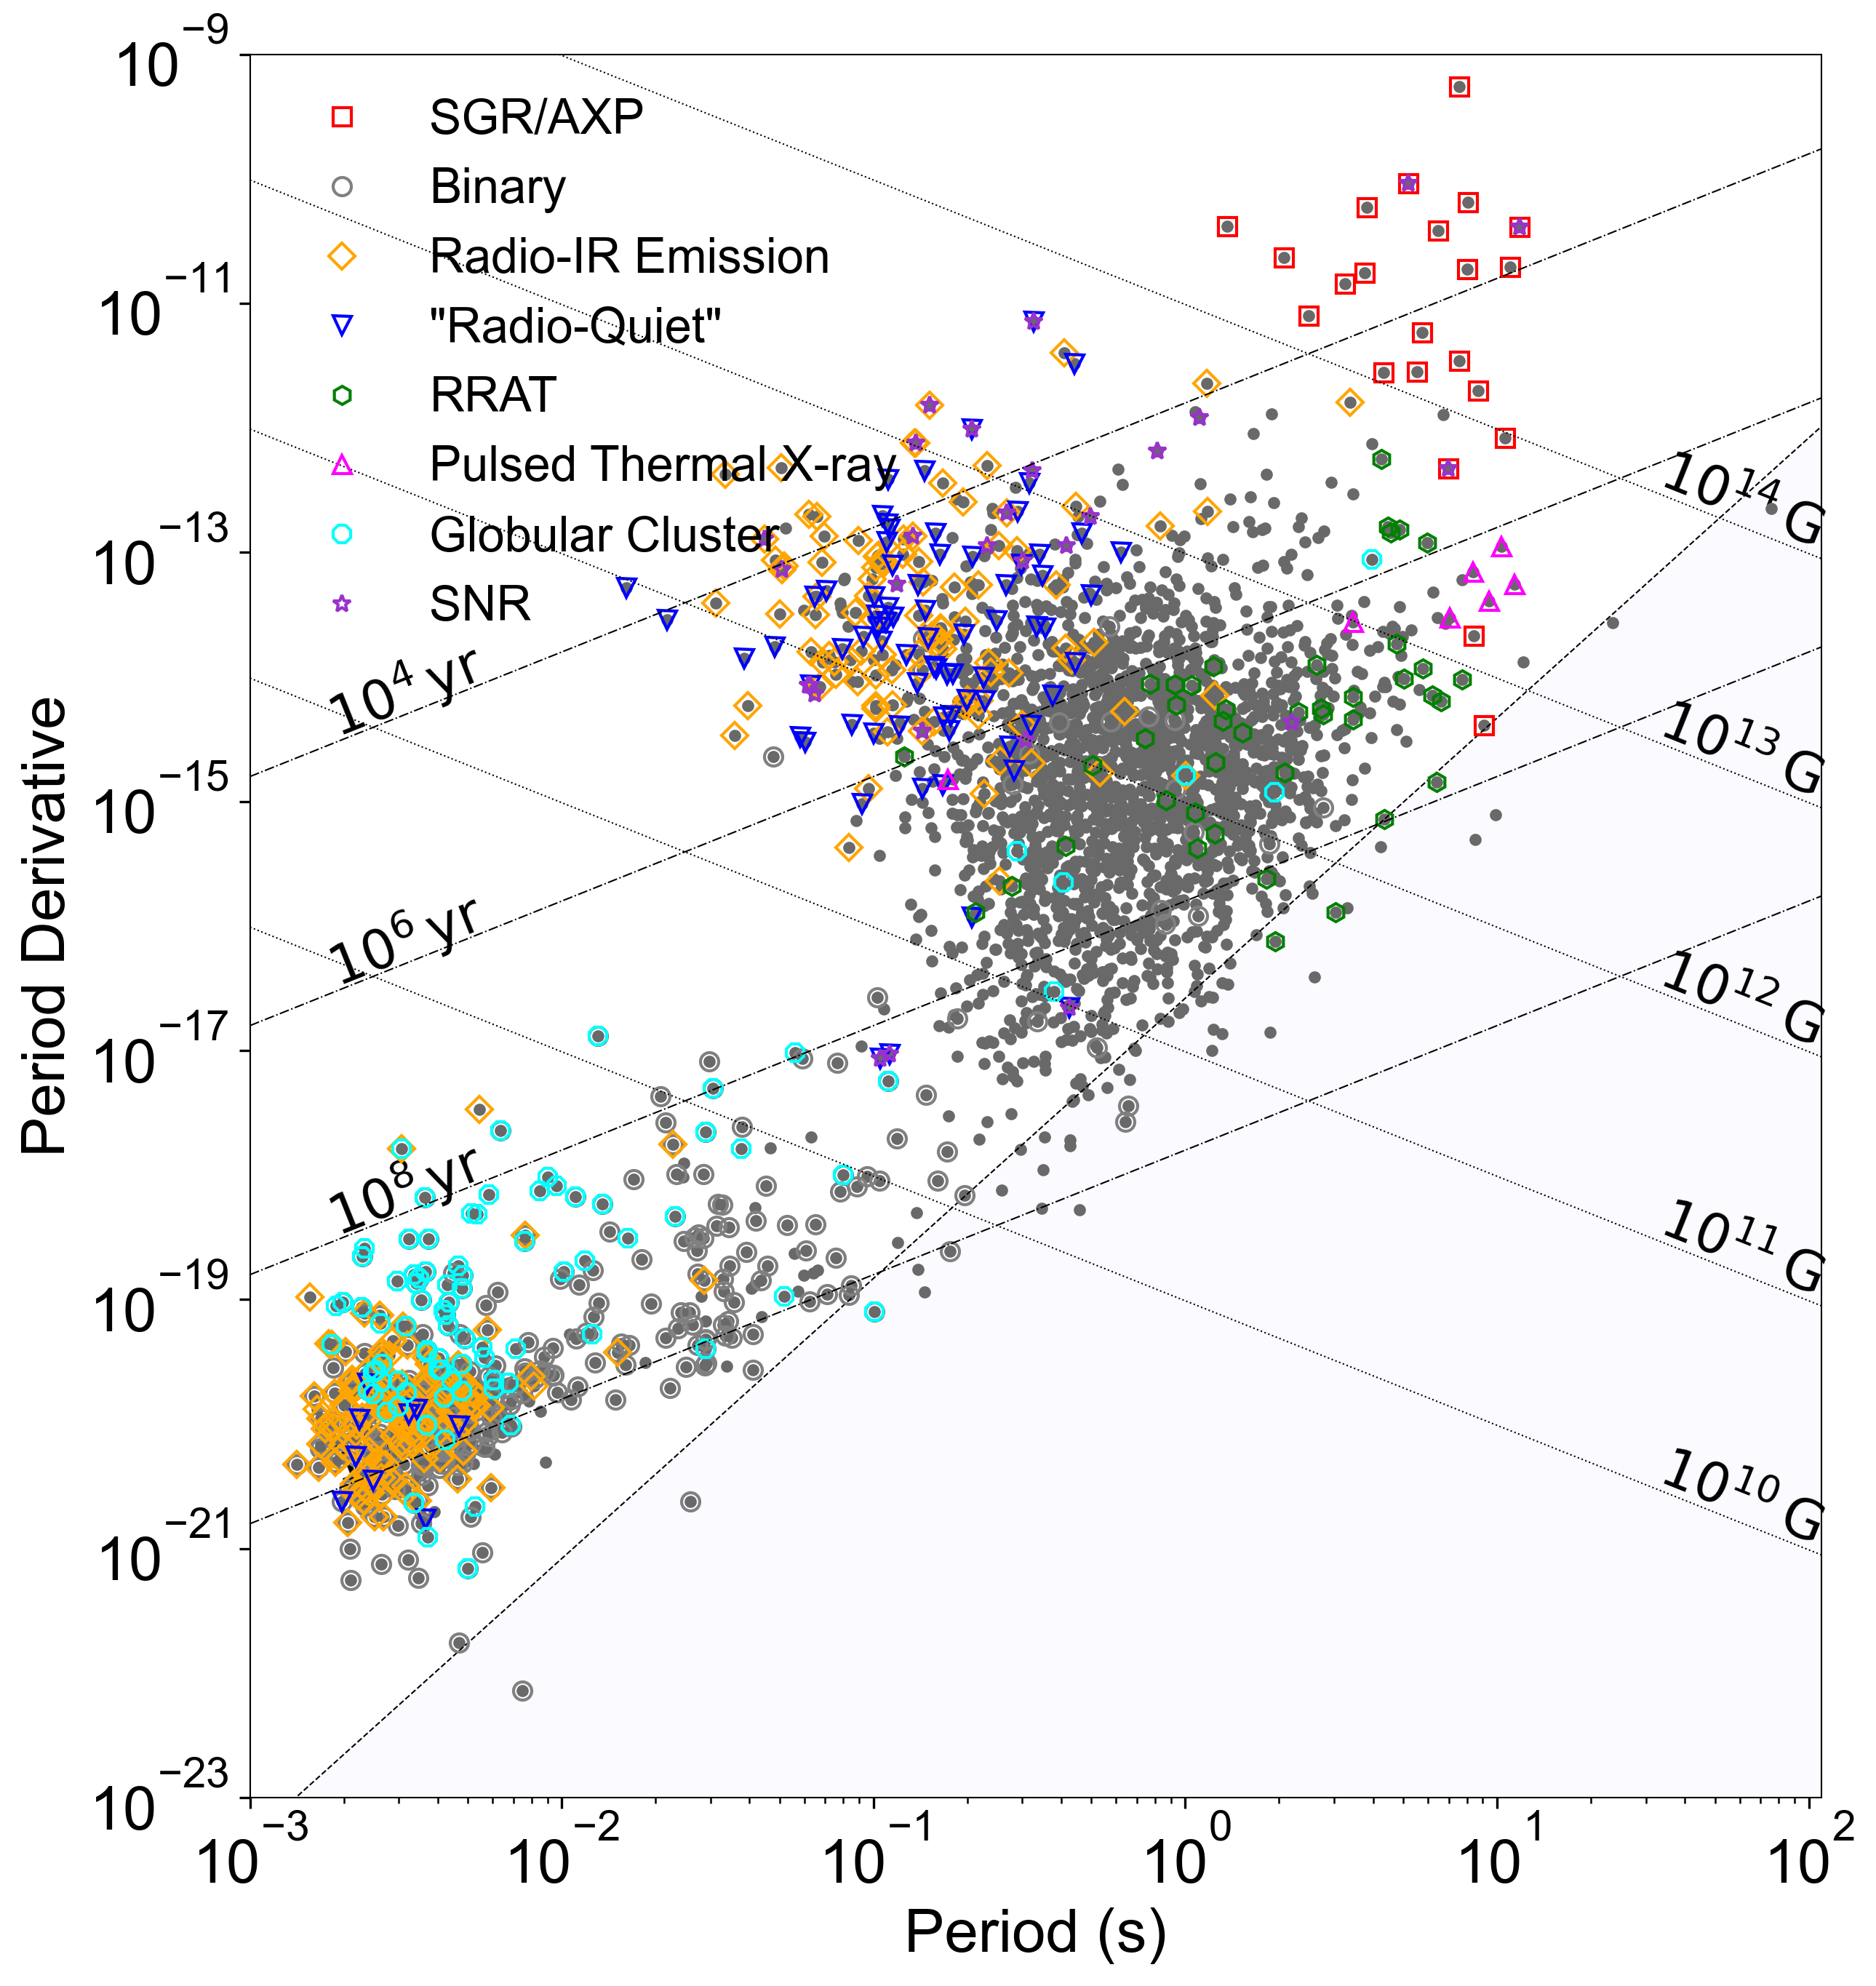

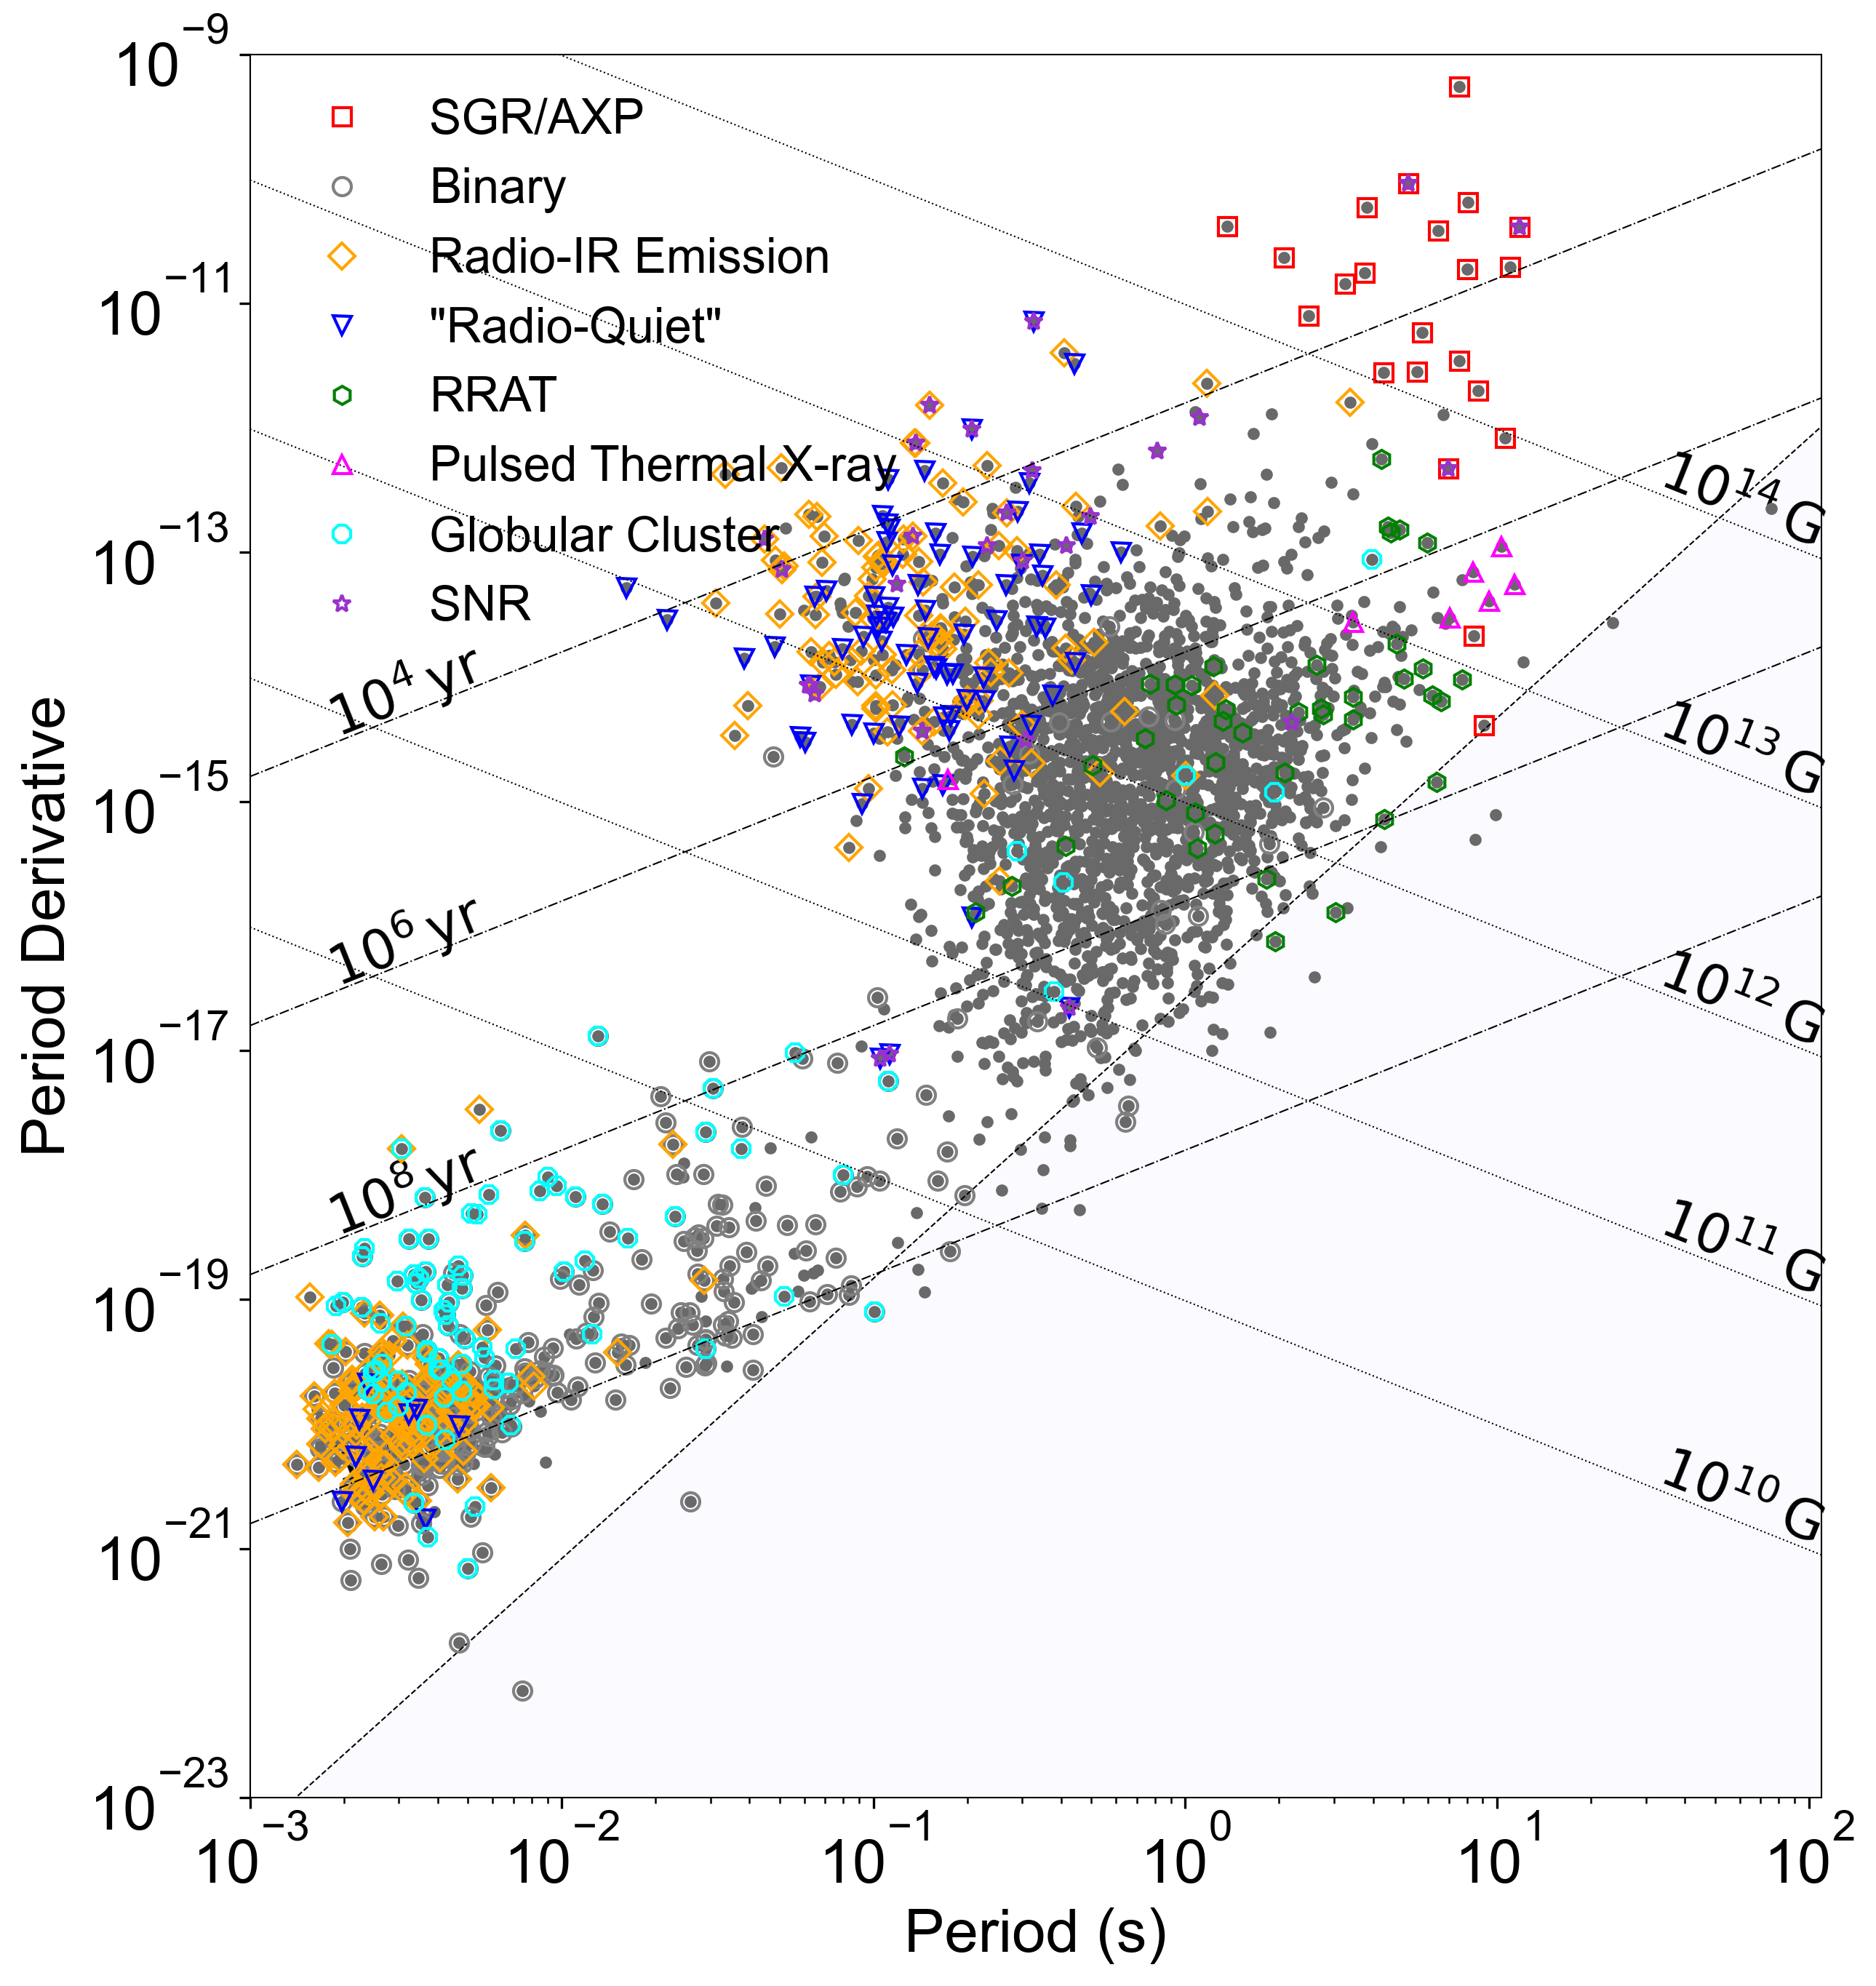

In [118]:
query.ppdot(showSNRs=True,showGCs=True, filldeathtype={'facecolor':'blue','alpha':0.02}, tau=[ 1e4, 1e6, 1e8 , 1e10],
          rcparams={'font.sans-serif':'Arial','figure.dpi': 300,}, periodlims=[0.001, 110],showtypes='all')

In [98]:
from psrqpy import QueryATNF

query = QueryATNF() 
print(query.table.colnames)

['PSRJ', 'PSRJ_REF', 'RAJ', 'RAJ_ERR', 'RAJ_REF', 'DECJ', 'DECJ_ERR', 'DECJ_REF', 'POSEPOCH', 'POSEPOCH_REF', 'PMRA', 'PMRA_ERR', 'PMRA_REF', 'PMDEC', 'PMDEC_ERR', 'PMDEC_REF', 'DM', 'DM_ERR', 'DM_REF', 'F0', 'F0_ERR', 'F0_REF', 'PEPOCH', 'PEPOCH_REF', 'F1', 'F1_ERR', 'F1_REF', 'PX', 'PX_ERR', 'PX_REF', 'S1400', 'S1400_REF', 'DIST_DM', 'DIST_DM_REF', 'DIST_DM1', 'DIST_DM1_REF', 'TYPE', 'ASSOC', 'SURVEY', 'JNAME', 'JNAME_REF', 'NAME', 'NAME_REF', 'RAJD', 'DECJD', 'RAJD_ERR', 'DECJD_ERR', 'DATE', 'DMEPOCH', 'DMEPOCH_REF', 'P0', 'P0_ERR', 'P0_REF', 'P1', 'P1_ERR', 'P1_REF', 'RM', 'RM_ERR', 'RM_REF', 'S400', 'S400_REF', 'S150', 'S150_ERR', 'S150_REF', 'S327', 'S327_ERR', 'S327_REF', 'W50', 'W50_REF', 'W10', 'W10_REF', 'W50_ERR', 'SPINDX', 'SPINDX_ERR', 'SPINDX_REF', 'FRACL', 'FRACL_ERR', 'FRACL_REF', 'FRACV', 'FRACV_ERR', 'FRACV_REF', 'FRACAV', 'FRACAV_ERR', 'FRACAV_REF', 'MAGINC', 'MAGINC_REF', 'IMPANG', 'IMPANG_REF', 'PASWING', 'PASWING_REF', 'F2', 'F2_ERR', 'F2_REF', 'F3', 'F3_ERR', 'F3

In [99]:
query = QueryATNF() 
table = query.table.to_pandas()
# 筛选 SURVEY 列包含 "FAST"
mask = table['SURVEY'].str.contains("FAST", case=False, na=False)
table_fast = table[mask]
print(f"FAST 发现的脉冲星数量: {len(table_fast)}")
print(table_fast['PSRJ'])

FAST 发现的脉冲星数量: 1455
1       J0006+1834
3         J0011+08
6       J0021-0909
7       J0023+0923
56        J0050+03
           ...    
4328    J2329+4743
4335    J2338+4818
4337      J2340+08
4347    J2355+0051
4350    J2355+2246
Name: PSRJ, Length: 1455, dtype: object


In [127]:
table_fast.to_csv(r'./table_fast_psr_v2.7.0.csv', index=False)

In [128]:
from psrqpy import QueryATNF
import pandas as pd

query = QueryATNF()
table = query.table.to_pandas()

# 处理 SURVEY 列，只看第一个出现的 survey
first_survey = table['SURVEY'].str.split(',', expand=True)[0]  # 取第一个调查/望远镜
mask_fast_first = first_survey.str.contains("FAST", case=False, na=False)

table_fast_first = table[mask_fast_first]

print(f"FAST 首次发现的脉冲星数量: {len(table_fast_first)}")
print(table_fast_first[['PSRJ','SURVEY']])

FAST 首次发现的脉冲星数量: 870
              PSRJ             SURVEY
6       J0021-0909        fast_crafts
122     J0203-0150        fast_crafts
125     J0209+4331        fast_crafts
128     J0211+4235        fast_crafts
171     J0344-0901        fast_crafts
...            ...                ...
4270    J2236+4929        fast_crafts
4292  J2258+5222_P          fast_gpps
4319    J2323+1214        fast_crafts
4335    J2338+4818        fast_crafts
4347    J2355+0051  fast_crafts,ar327

[870 rows x 2 columns]


In [129]:
table_fast_first.to_csv(r'./table_fast_psr_first_v2.7.0.csv', index=False)

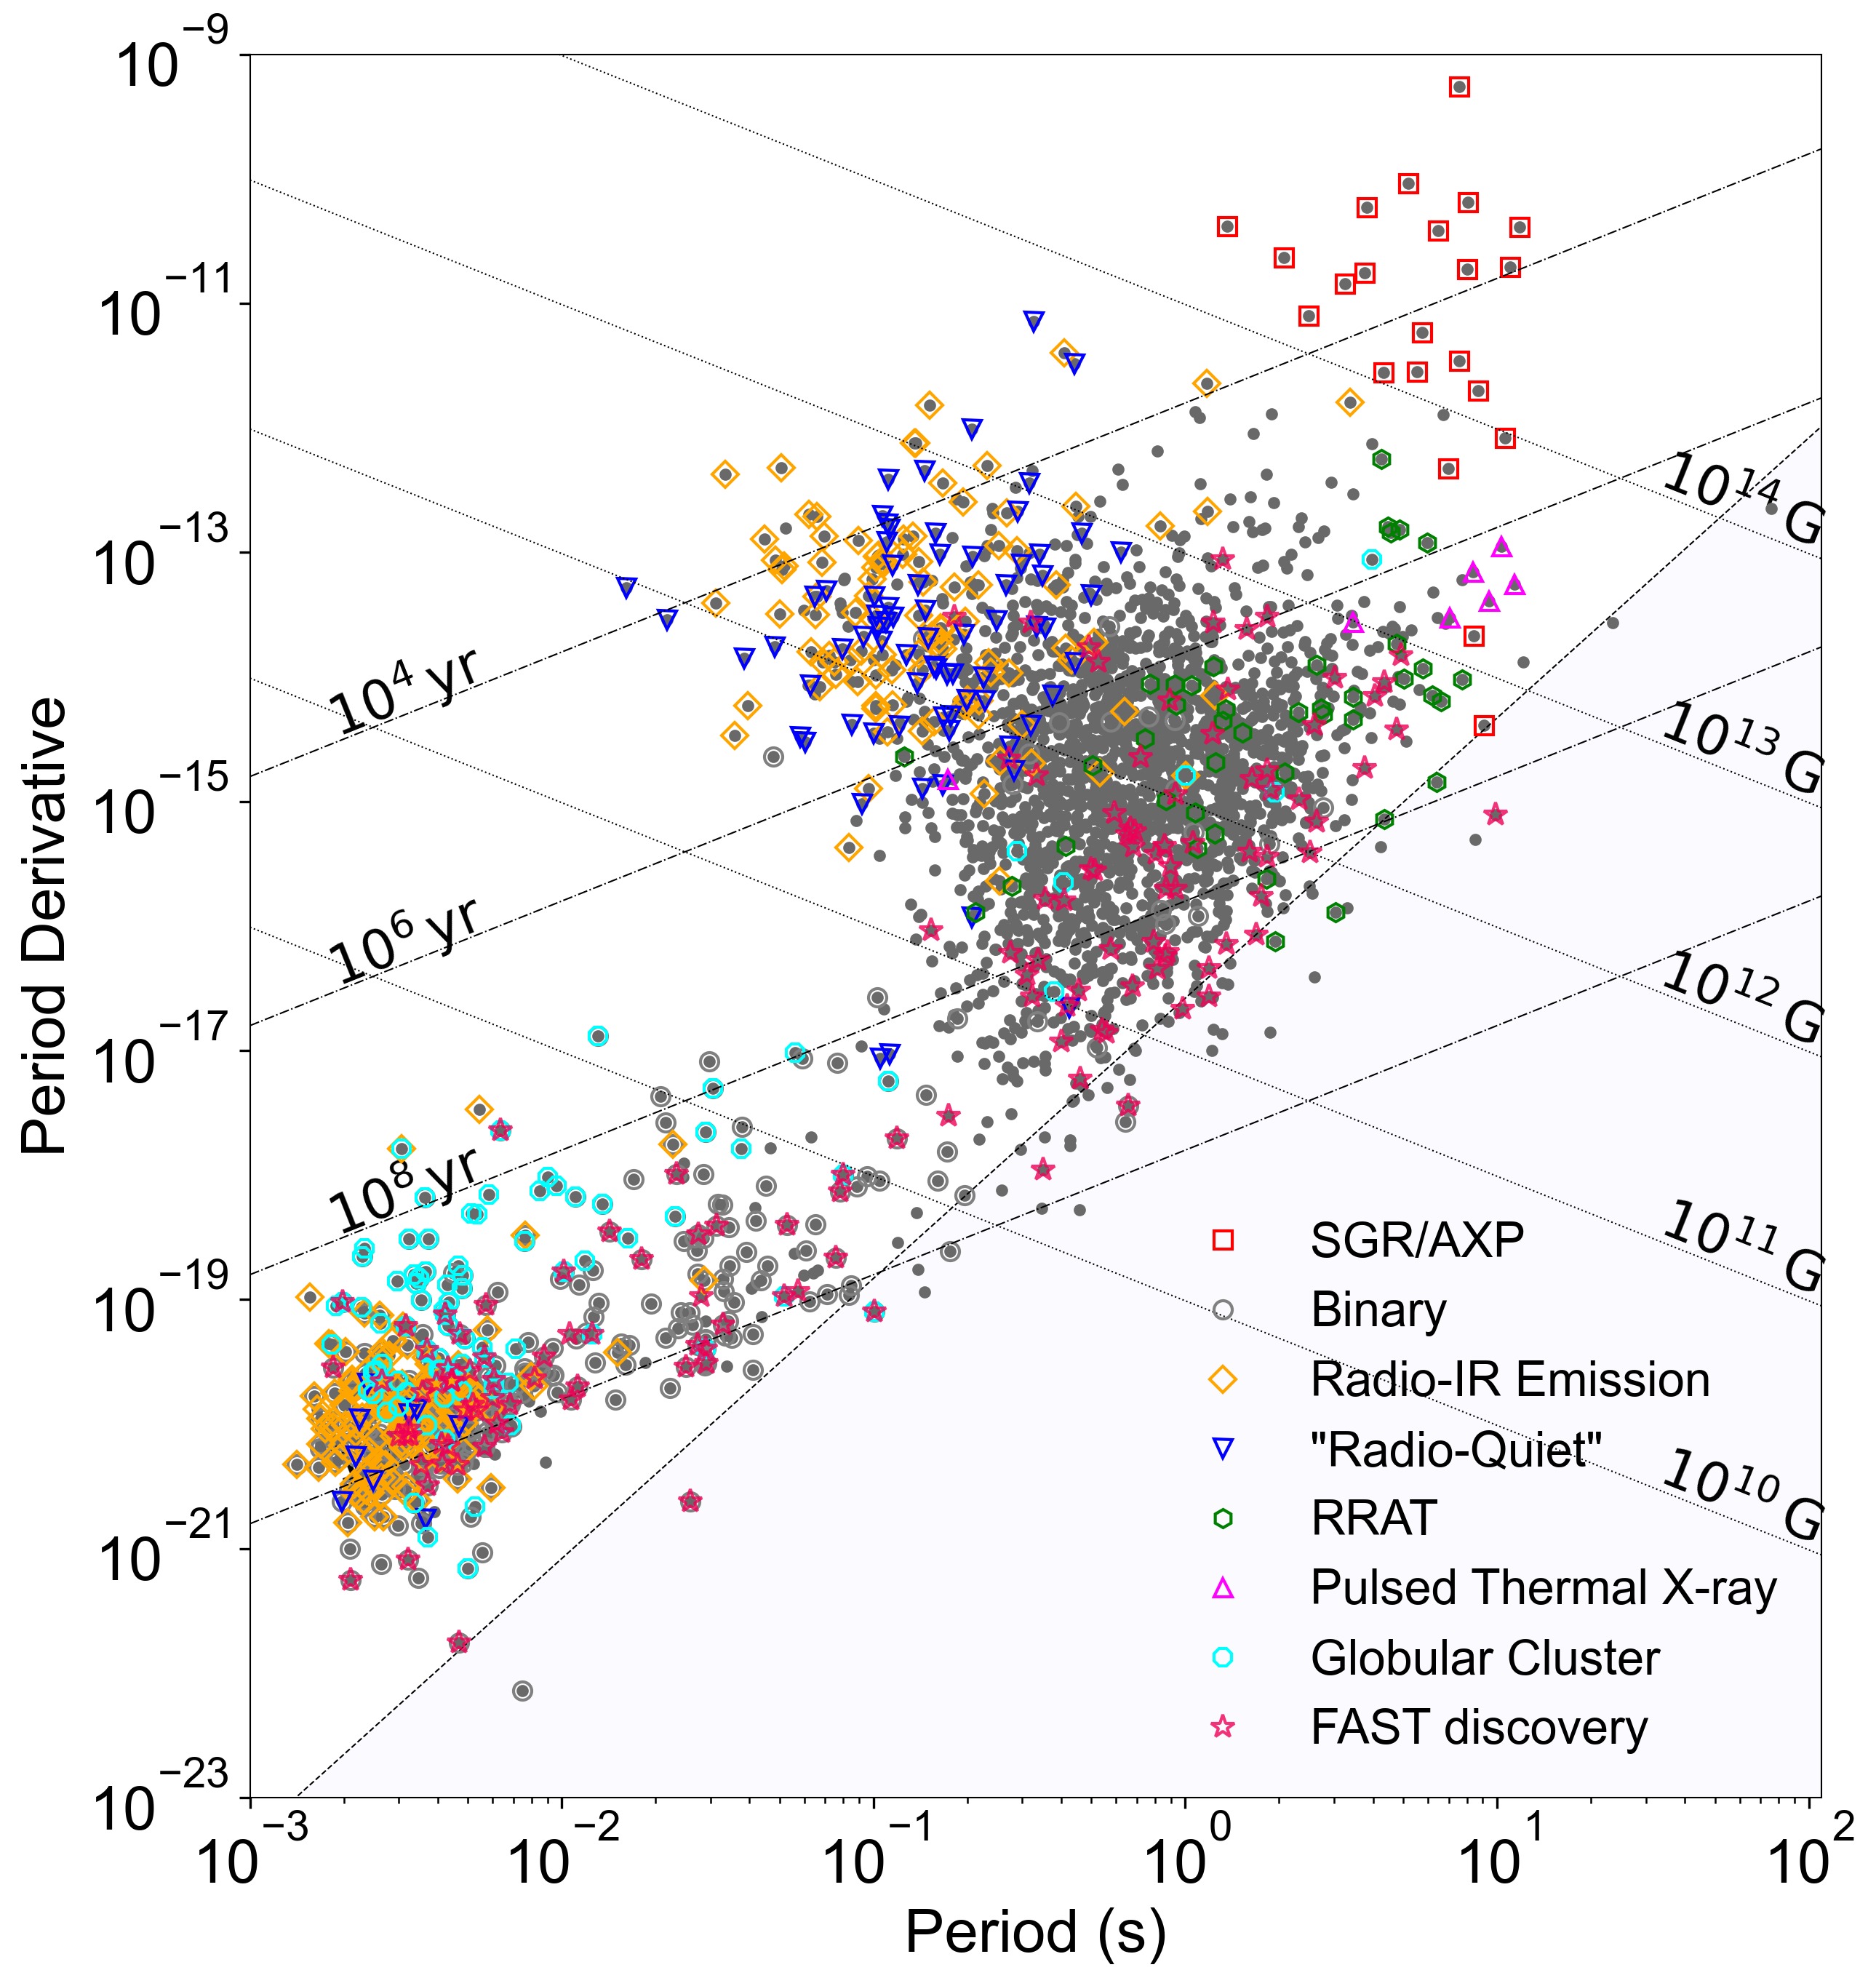

In [130]:
import matplotlib.pyplot as plt

# P 和 Pdot
P = np.array(table_fast_first['P0'])
Pdot = np.array(table_fast_first['P1'])
# 先画所有 pulsars
# q.ppdot(showtypes='all', rcparams={'font.sans-serif':'Arial'})
query.ppdot(showGCs=True, filldeathtype={'facecolor':'blue','alpha':0.02}, tau=[ 1e4, 1e6, 1e8 , 1e10],
          rcparams={'font.sans-serif':'Arial','figure.dpi': 300,}, periodlims=[0.001, 110]
,showtypes='all')

# 高亮 FAST 发现的 pulsars
plt.loglog(P, Pdot, '*', markersize=8, markerfacecolor='None', markeredgecolor='#f00056',  alpha=0.8, label='FAST discovery')
plt.legend()
plt.savefig('ppdot.png', dpi=600, bbox_inches='tight')  # bbox_inches='tight' 去掉多余空白
plt.savefig('ppdot.pdf', dpi=600, bbox_inches='tight')  # bbox_inches='tight' 去掉多余空白
plt.show()

In [24]:
from psrqpy.utils import get_gc_catalogue
gctable = get_gc_catalogue()
gctable

<GCTable length=349>
Cluster   NGC       Pulsar    Offset Offset error  Period  ...    x    x error    e            e error            m2  
                              arcmin    arcmin    0.001 s  ...    s       s                                    solMass
 str14    str8      str12    float64   float64    float64  ... float64 float64 float64         float64         float64
------- -------- ----------- ------- ------------ -------- ... ------- ------- -------- ---------------------- -------
 47 Tuc  NGC 104 J0023-7204C    1.21           --  5.75678 ...      --      --       --                     --      --
 47 Tuc  NGC 104 J0024-7204D    0.68           --  5.35757 ...      --      --       --                     --      --
 47 Tuc  NGC 104 J0024-7205E    0.65           --  3.53633 ... 1.98184      --  0.00031                     --    0.18
 47 Tuc  NGC 104 J0024-7204F    0.19           --  2.62358 ...      --      --       --                     --      --
 47 Tuc  NGC 104 J0024-7204G    0.29           --  4.04038 ...      --      --       --                     --      --
 47 Tuc  NGC 104 J0024-7204H    0.77           --  3.21034 ... 2.15281      --  0.07056                     --    0.19
 47 Tuc  NGC 104 J0024-7204I    0.29           --  3.48499 ... 0.03844      --   0.0004                     --   0.015
 47 Tuc  NGC 104 J0023-7203J     1.0           --  2.10063 ...  0.0404      --    4e-05                     --   0.024
 47 Tuc  NGC 104 J0024-7204L    0.14           --  4.34617 ...      --      --       --                     --      --
 47 Tuc  NGC 104 J0023-7205M    1.05           --  3.67664 ...      --      --       --                     --      --
 47 Tuc  NGC 104 J0024-7204N    0.49           --  3.05395 ...      --      --       --                     --      --
 47 Tuc  NGC 104 J0024-7204O    0.06           --  2.64334 ... 0.04515      --  0.00016                     --   0.025
    ...      ...         ...     ...          ...      ... ...     ...     ...      ...                    ...     ...
     M2 NGC 7089 J2133-0049A    0.19           -- 10.14929 ... 3.14001      -- 0.075158 4.9999999999999996e-06    0.19
     M2 NGC 7089 J2133-0049B    0.56           --  6.97455 ... 5.89118      -- 2.34e-06                  9e-08    0.21
     M2 NGC 7089 J2133-0049C    0.49           --  3.00493 ... 1.10966      --  1.3e-06                  8e-07    0.16
     M2 NGC 7089 J2133-0049D    0.16           --  4.21574 ... 3.72067      --    8e-06                  1e-06    0.27
     M2 NGC 7089 J2133-0049E    0.08           --  3.70312 ... 1.84175      --  0.03573                  2e-06  0.2148
     M2 NGC 7089 J2133-0049F    0.32           --  4.78089 ...  1.6188      --    2e-05                  2e-05     0.1
     M2 NGC 7089 J2133-0049G    0.42           --  2.53574 ... 0.02533      --      0.0                     --   0.015
     M2 NGC 7089 J2133-0049H      --           --    2.878 ...      --      --       --                     --      --
     M2 NGC 7089 J2133-0049I      --           --     8.78 ...      --      --       --                     --      --
     M2 NGC 7089 J2133-0049J      --           --      4.5 ...      --      --       --                     --      --
    M30 NGC 7099 J2140-2310A   0.067           --  11.0193 ... 0.23494      --  0.00012                     --    0.11
    M30 NGC 7099 J2140-2310B     1.2          0.1 12.98983 ... 19.5222      --  0.87938                     --    1.31

In [11]:
from psrqpy.utils import get_msp_catalogue
msps = get_msp_catalogue()
msps

<Table masked=True length=637>
   NAME       P0      DM       GL      GB      PB      A1   DISCOVERY YEAR      NOTES     
           0.001 s pc / cm3   deg     deg      d       s          yr                      
  str11    float64 float64  float64 float64 float64 float64     int32           str15     
---------- ------- -------- ------- ------- ------- ------- -------------- ---------------
J0023+0923    3.05     14.3   111.4   -52.8   0.139   0.035           2009       GBT-Fermi
J0030+0451    4.87      4.3   113.1   -57.6     nan     nan           2000          AO-430
J0034-0534    1.88     13.8   111.5   -68.1   1.589   1.438           1994         PKS-SSS
J0101-6422    2.57     11.9   301.2   -52.7   1.788   1.701           2009       PKS-Fermi
J0102+4839    2.96     53.5   124.9   -14.2   1.672   1.856           2010       GBT-Fermi
J0125-2327    3.68      9.6   190.0   -81.6     nan     nan           2015       GBT-GBNCC
J0131-5344    2.22     16.8   290.3   -62.4     nan     nan           2023 MK-TRAPUM-Fermi
J0154+1833    2.36     19.8   143.3   -41.8     nan     nan           2013     AO-327Drift
J0203-0150    5.17     19.2   160.3   -59.4  49.964   12.58           2017     FAST-CRAFTS
J0210+3211    4.92    125.7   141.7   -27.8     nan     nan           2022     FAST-CRAFTS
J0214+5222   24.58     22.0   135.6    -8.4 512.039 174.566           2014       GBT-GBNCC
J0218+4232    2.32     61.2   139.5   -17.5   2.029   1.984           1995          JB-TCS
       ...     ...      ...     ...     ...     ...     ...            ...             ...
J2241-5236    2.19     11.4   337.5   -54.9   0.146   0.026           2009       PKS-Fermi
J2256-1024    2.29     13.8    59.0   -58.1    0.21     nan           2011       GBT-Drift
  J2301+20    5.94     32.4    91.1   -35.2     nan     nan           2016     AO-327Drift
J2302+4442    5.19     13.8   103.4   -14.0 125.935   51.43           2009       NRT-Fermi
J2310-0555    2.61     15.5    69.9   -57.8     1.4    1.38           2013       GBT-Fermi
J2317+1439    3.45     21.9    91.4   -42.4   2.459   2.314           1993          AO-430
J2319+2048     3.4     22.1    95.5   -37.1     nan     nan           2019     FAST-CRAFTS
J2322+2057    4.81     13.4    96.5   -37.3     nan     nan           1993          AO-430
J2322-2650    3.46      6.1    28.6   -70.2   0.323   0.002           2018        PKS-HTRU
J2333-5526     2.1     19.9   324.1   -58.4   0.287     nan           2021 MK-TRAPUM-Fermi
J2339-0533    2.88     8.72    81.3   -62.5   0.193   0.612           2012       GBT-Fermi
J2355+0051    3.72     11.1    95.2   -59.0  11.751   8.893           2018     FAST-CRAFTS

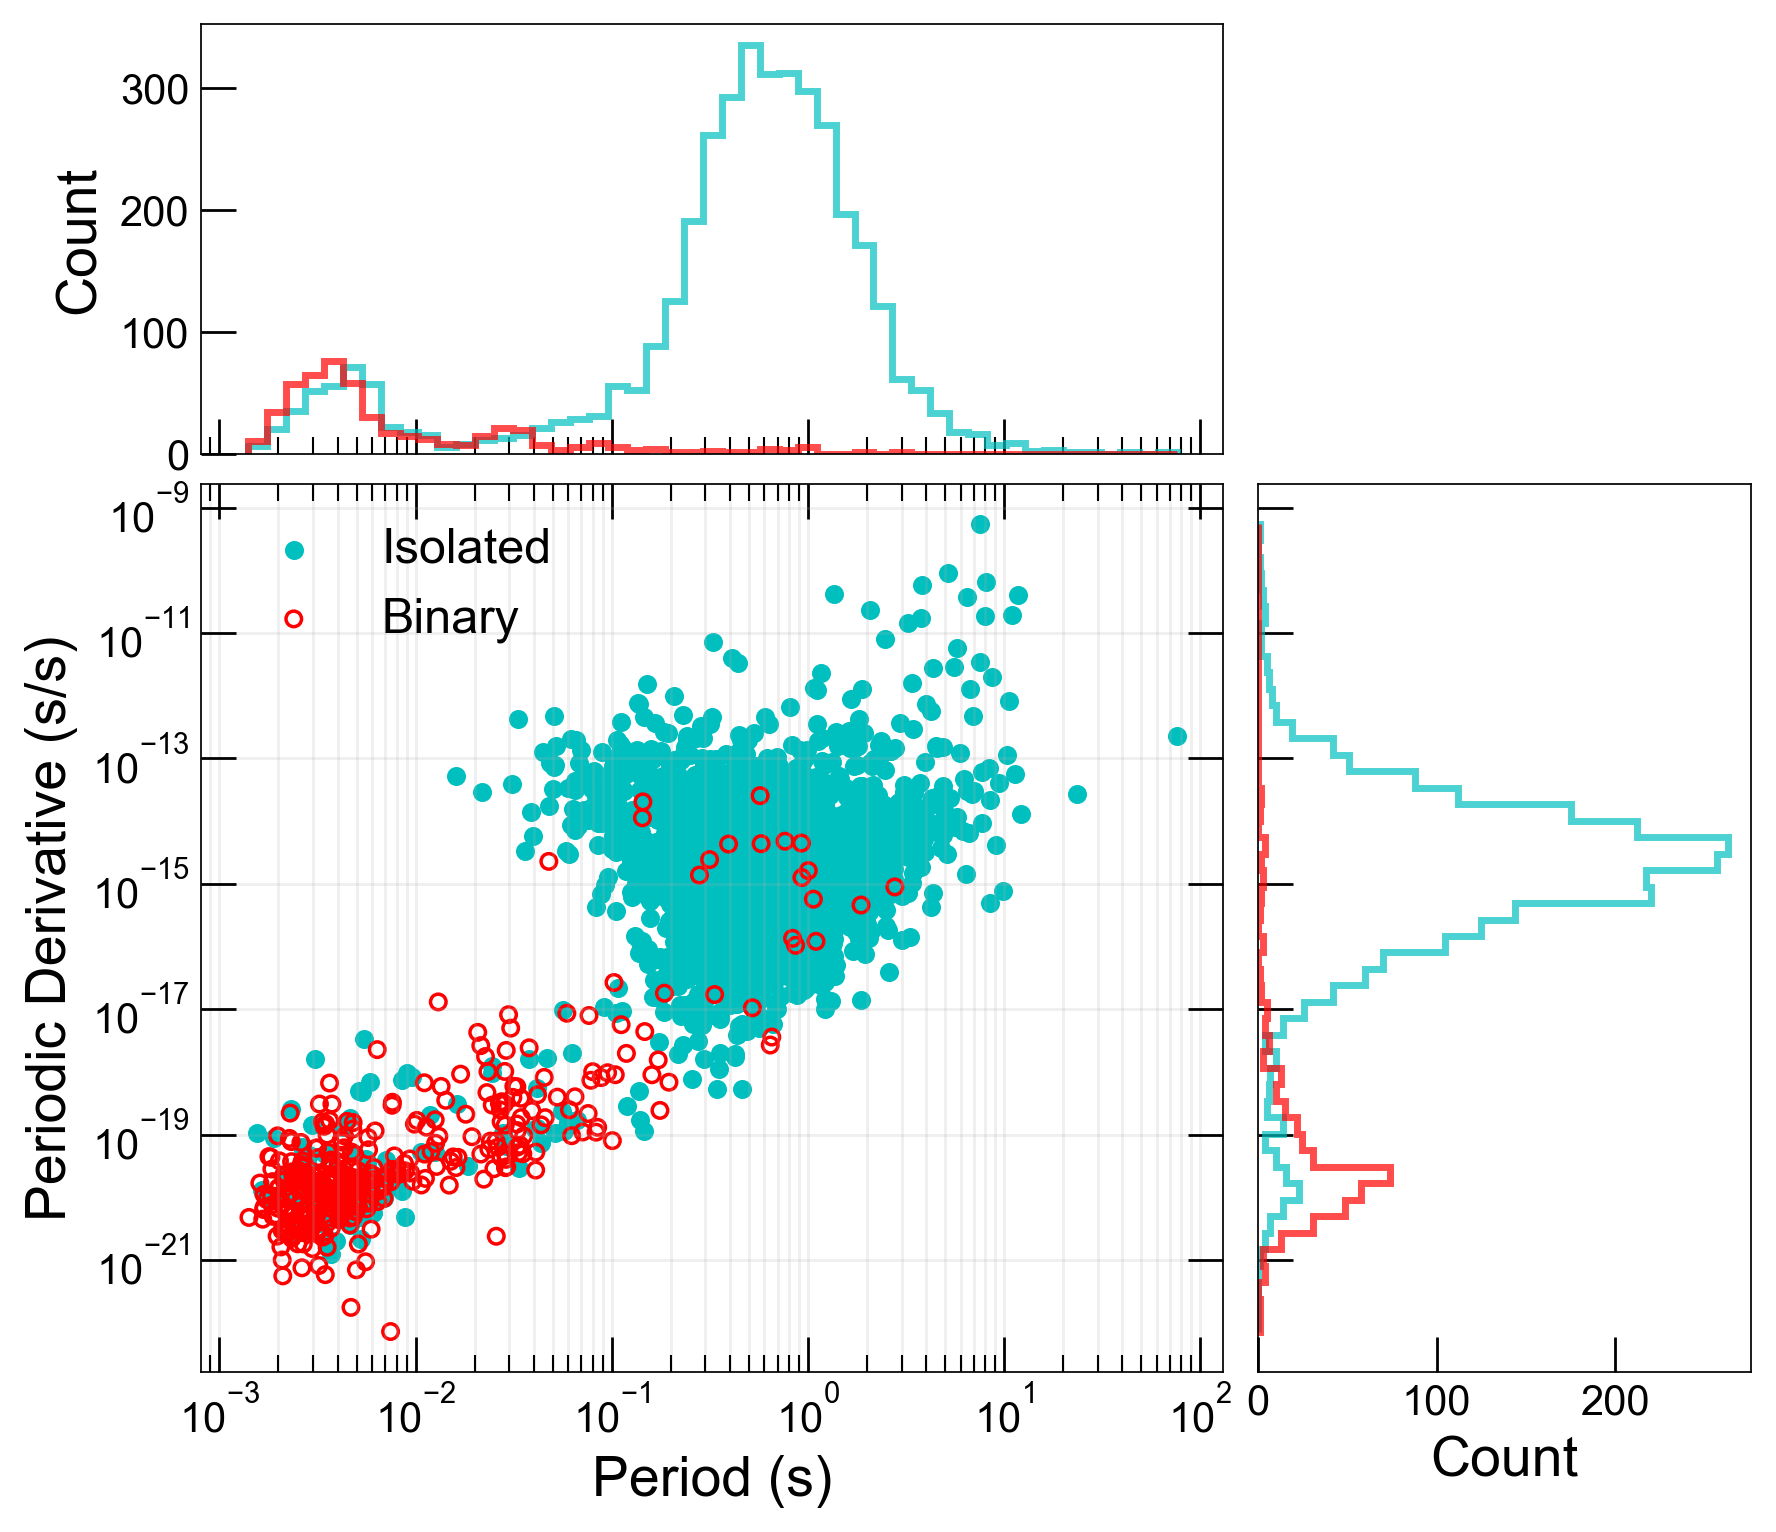

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
plt.rcParams["font.family"] = "Arial"

# 假设 ATNF_psr 是一个 DataFrame
# ATNF_psr = pd.read_csv('your_data.csv')

# 筛选 P0 小于 0.03 的数据
filtered_data = ATNF_psr[ATNF_psr['P0'] < 111100000000000]

# 筛选 BINARY 列有数据的行
binary_data = filtered_data[filtered_data['BINARY'].notna()]
# 筛选 BINARY 列无数据的行
isolated_data = filtered_data[filtered_data['BINARY'].isna()]

# 创建一个包含 3x3 网格的 GridSpec 对象
fig = plt.figure(figsize=(8, 7))
gs = GridSpec(3, 3, figure=fig)
gs.update(hspace=0.07, wspace=0.07)


# 定义散点图的子图位置
ax_scatter = fig.add_subplot(gs[1:, :-1])
# 定义上方直方图的子图位置
ax_hist_x = fig.add_subplot(gs[0, :-1], sharex=ax_scatter)
# 定义右侧直方图的子图位置
ax_hist_y = fig.add_subplot(gs[1:, -1], sharey=ax_scatter)

# 设置所有子图的边框线宽
linewidth = 0.5  # 线宽设置
for spine in ax_scatter.spines.values():
    spine.set_linewidth(linewidth)
for spine in ax_hist_x.spines.values():
    spine.set_linewidth(linewidth)
for spine in ax_hist_y.spines.values():
    spine.set_linewidth(linewidth)

# 绘制散点图
isolated_scatter = ax_scatter.scatter(isolated_data['P0'], isolated_data['P1'], color="c", s=20, label='Isolated')
binary_scatter = ax_scatter.scatter(binary_data['P0'], binary_data['P1'], color="none", edgecolor="red", s=20, linewidth=1, label='Binary')

# 设置散点图的坐标轴
ax_scatter.set_xscale('log')
ax_scatter.set_yscale('log')
ax_scatter.set_xlabel('Period (s)', fontsize=16)
ax_scatter.set_ylabel('Periodic Derivative (s/s)', fontsize=16)
ax_scatter.tick_params(labelsize=16)
# 统一设置上下左右的刻度样式
ax_scatter.tick_params(
    axis='both',
    which='major',
    top=True, bottom=True, left=True, right=True,
    length=10,
    direction='in',
    labelsize=12
)
# 统一设置上下左右的刻度样式
ax_scatter.tick_params(
    axis='both',
    which='minor',
    top=True, bottom=True, left=True, right=True,
    length=5,
    direction='in',
    labelsize=12
)

# 过滤掉 P0 和 P1 中的零和负数
valid_isolated_p0 = isolated_data['P0'][isolated_data['P0'] > 0]
valid_isolated_p1 = isolated_data['P1'][isolated_data['P1'] > 0]
valid_binary_p0 = binary_data['P0'][binary_data['P0'] > 0]
valid_binary_p1 = binary_data['P1'][binary_data['P1'] > 0]

# 绘制上方的 P0 直方图，使用线性形式
bins_x = np.logspace(np.log10(min(valid_isolated_p0.min(), valid_binary_p0.min())),
                     np.log10(max(valid_isolated_p0.max(), valid_binary_p0.max())), 50)
ax_hist_x.hist(valid_isolated_p0, bins=bins_x, color="c", alpha=0.7, label='Isolated', histtype='step', linewidth=2)
ax_hist_x.hist(valid_binary_p0, bins=bins_x, color="red", alpha=0.7, label='Binary', histtype='step', linewidth=2)
ax_hist_x.set_ylabel('Count', fontsize=16)
ax_hist_x.tick_params(axis='x', labelbottom=False)
#ax_hist_x.legend(fontsize=16)

# 绘制右侧的 P1 直方图，使用线性形式
bins_y = np.logspace(np.log10(min(valid_isolated_p1.min(), valid_binary_p1.min())),
                     np.log10(max(valid_isolated_p1.max(), valid_binary_p1.max())), 50)
ax_hist_y.hist(valid_isolated_p1, bins=bins_y, orientation='horizontal', color="c", alpha=0.7, label='Isolated', histtype='step', linewidth=2)
ax_hist_y.hist(valid_binary_p1, bins=bins_y, orientation='horizontal', color="red", alpha=0.7, label='Binary', histtype='step', linewidth=2)
ax_hist_y.set_xlabel('Count', fontsize=16)
ax_hist_y.tick_params(axis='y', labelleft=False)
#ax_hist_y.legend(fontsize=16)

# 上方直方图设置刻度线朝内
ax_hist_x.tick_params(
    axis='both',
    which='major',
    top=False, bottom=True, left=True, right=False,
    length=10,
    direction='in',
    labelsize=12
)
ax_hist_x.tick_params(
    axis='both',
    which='minor',
    top=False, bottom=True, left=True, right=False,
    length=5,
    direction='in',
    labelsize=12
)

# 右侧直方图设置刻度线朝内
ax_hist_y.tick_params(
    axis='both',
    which='major',
    top=False, bottom=True, left=True, right=False,
    length=10,
    direction='in',
    labelsize=12
)
ax_hist_y.tick_params(
    axis='both',
    which='minor',
    top=False, bottom=True, left=True, right=False,
    length=5,
    direction='in',
    labelsize=12
)

# 添加图例
ax_scatter.legend(fontsize=14)
# 显示网格线
ax_scatter.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()